# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from joblib import dump
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head())
display(df.info())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

In [5]:
df.is_ultra.value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

## Разбейте данные на выборки

In [58]:
df_train, df_valid = train_test_split(df, test_size=0.3, random_state=12345)
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=12345)
print('Размер тестовой выборки:',df_test.shape[0],'объекта')
print('Размер валидационной выборки:', df_valid.shape[0],'объекта')
print('Размер обучающей выборки:', df_train.shape[0],'объектов')

Размер тестовой выборки: 483 объекта
Размер валидационной выборки: 482 объекта
Размер обучающей выборки: 2249 объектов


In [13]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345, stratify=y_valid)

print('X_train:', X_train.shape)
print('X_valid:', X_valid.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_valid:', y_valid.shape)
print('y_test:', y_test.shape)

X_train: (1928, 4)
X_valid: (643, 4)
X_test: (643, 4)
y_train: (1928,)
y_valid: (643,)
y_test: (643,)


## Исследуйте модели

Нужно построить модель для задачи классификации, которая выберет подходящий тариф, исходя из поставленной задачи в переменную **target** поместим данные столбца *is_ultra*, а в переменную **features** весь дата сет, за исключением столбца *is_ultra*

In [59]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']


features_train = df_train.drop(['is_ultra'], axis=1) 
target_train = df_train['is_ultra']


features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']


features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

print(features.shape)
print(target.shape)
print('Обучающие признаки:', features_train.shape, target_train.shape)
print('Валидационные признаки:', features_valid.shape, target_valid.shape)
print('Тестовые признаки:', features_test.shape, target_test.shape)


(3214, 4)
(3214,)
Обучающие признаки: (2249, 4) (2249,)
Валидационные признаки: (482, 4) (482,)
Тестовые признаки: (483, 4) (483,)


**Решающее дерево**

Начнем исследование моделей с **решающего дерева** *DecisionTreeClassifier*. Обучим модель, перебрав циклом разные значения глубины.

In [60]:
best_model = None
best_result = 0
depths = []
dtc_accuracies = []
for depth in range(1, 26):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions)
    depths.append(depth)
    dtc_accuracies.append(result)
    if result > best_result:
        best_model = model
        best_result = result
        
        
print("Accuracy лучшей модели:", best_result)
print(depths)
print(dtc_accuracies)

Accuracy лучшей модели: 0.7946058091286307
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0.7510373443983402, 0.7800829875518672, 0.7863070539419087, 0.7883817427385892, 0.7614107883817427, 0.7842323651452282, 0.7821576763485477, 0.7821576763485477, 0.7780082987551867, 0.7883817427385892, 0.7904564315352697, 0.7946058091286307, 0.7821576763485477, 0.7821576763485477, 0.7593360995850622, 0.7489626556016598, 0.7510373443983402, 0.7551867219917012, 0.7551867219917012, 0.7282157676348547, 0.7406639004149378, 0.7385892116182573, 0.7448132780082988, 0.7489626556016598, 0.7406639004149378]


Теперь визуализируем полученные данные для простоты восприятия.

In [61]:
dtc_data = data=pd.DataFrame(data=dtc_accuracies, index=depths)
display(dtc_data.head(5))

,0
1,0.751037
2,0.780083
3,0.786307
4,0.788382
5,0.761411


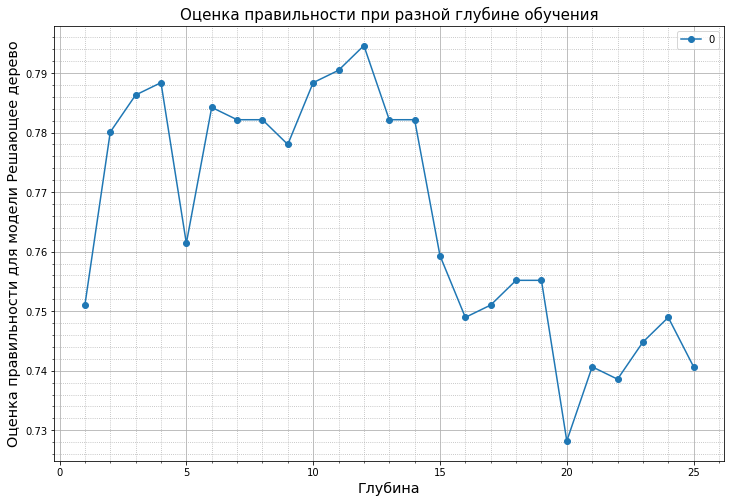

In [62]:
dtc_data.plot(style='o-', figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Оценка правильности при разной глубине обучения', fontsize=15)
plt.ylabel('Оценка правильности для модели Решающее дерево', fontsize='x-large')
plt.xlabel('Глубина', fontsize='x-large')
plt.show()

Итак, мы видим, что модель получает оценку правильности выше, чем 0,75 на отрезке от depth=1 до depth=14. Далее на отрезке 17-19, затем оценка правильности резко падает и составляет на более 0,75. Соответственно наиболее продуктивной глубиной обучения является диапазон от 1 до 16, а модель с самой высокой оценкой правильности имеет значение depth=12. 

**Random Forest**

In [106]:
ests = []
rfc_accuracies = []
best_model = None
best_result = 0
for est in range(1, 26):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    ests.append(est)
    rfc_accuracies.append(result)
    if result > best_result:
        best_model = model
        best_result = result 

print("Accuracy лучшей модели на валидационной выборке:", best_result)

Accuracy лучшей модели на валидационной выборке: 0.7987551867219918


In [107]:
rfc_data = pd.DataFrame(data=rfc_accuracies, index=ests)
display(dtc_data.head(5))

,0
1,0.751037
2,0.780083
3,0.786307
4,0.788382
5,0.761411


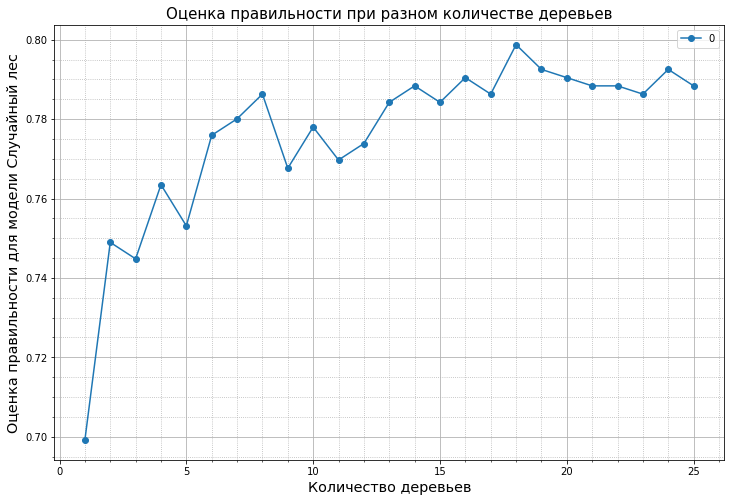

In [65]:
rfc_data.plot(style='o-', figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Оценка правильности при разном количестве деревьев', fontsize=15)
plt.ylabel('Оценка правильности для модели Случайный лес', fontsize='x-large')
plt.xlabel('Количество деревьев', fontsize='x-large')
plt.show()

Модель получает оценку правильности выше, чем 0,75 на отрезке от est=4. Самая высокая оценка точности получена при количестве деревьев равном 18.

Рассмотрим модель обученную методом **Логистической регрессии**

In [113]:
lrg_accuracies = []
best_model = None
best_result = 0
for iterat in range(1, 1000):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iterat)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    lrg_accuracies.append(result)
    if result > best_result:
        best_model = model
        best_result = result
print("Accuracy лучшей модели на валидационной выборке:", best_result)

Accuracy лучшей модели на валидационной выборке: 0.6950207468879668


Лучшая оценка правильности для 1000 итераций обучения 0.69, что не достигает целевого показателя 0.75 обозначенного в целях исследования.

Обучим модель методом **Ближайших соседей**

In [108]:
best_model = None
best_result = 0
neighbors_list = []
knc_accuracies = []
for neighbors in range(1,30,5):
    model = KNeighborsClassifier(n_neighbors = neighbors)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    neighbors_list.append(neighbors)
    knc_accuracies.append(result)
    if result > best_result:
        best_model = model
        best_result = result
print("Accuracy лучшей модели на валидационной выборке:", best_result)

Accuracy лучшей модели на валидационной выборке: 0.7551867219917012


In [104]:
knc_data = pd.DataFrame(data=knc_accuracies, index=neighbors_list)
display(knc_data.head(5))

,0
1,0.726141
6,0.751037
11,0.755187
16,0.751037
21,0.755187


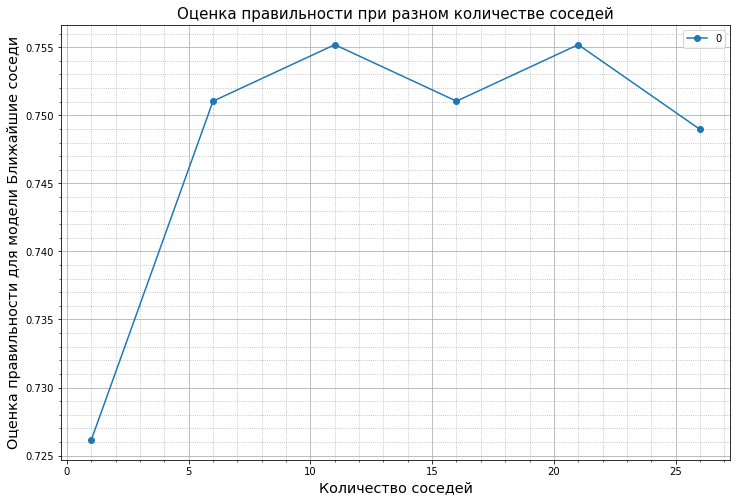

In [105]:
knc_data.plot(style='o-', figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.title('Оценка правильности при разном количестве соседей', fontsize=15)
plt.ylabel('Оценка правильности для модели Ближайшие соседи', fontsize='x-large')
plt.xlabel('Количество соседей', fontsize='x-large')
plt.show()

Показатель оценки правильности от 0.75 достигается при количестве соседей от 6 до 25, с самой выской правильностью при количестве соседей 11 и 21.

**Вывод**

Было исследовано четыре модели обучения: 
- *Решающее дерево* - **Accuracy** лучшей модели: 0.7946058091286307, при глубине обучения 12.
- *Случайный лес* - **Accuracy** лучшей модели на валидационной выборке: 0.7987551867219918, при количестве деревьев 18.
- *Логистическая регрессия* - **Accuracy** наилучшей модели на валидационной выборке: 0.6950207468879668, при 1000 итераций обучения.
- *Ближайшие соседи* - **Accuracy** лучшей модели на валидационной выборке: 0.7551867219917012, при количестве соседей 11 и 21.

С опорой на полученные результаты можно сделать вывод, что самую высокую оценку правильности показывает модель "Случайный лес", с чуть меньшей точностью работает модель "Решающее дерево", модель обученная методом "Ближайшие соседи" показывает результат, который соответствует заявленному в требованиях исследования, и модель обученная методом логистической регрессии не показал требуемый результат по оценке правильности равной 0.75 и более.

## Проверьте модель на тестовой выборке

Проверим модель Случайный лес на тестовой выборке.

In [130]:
model = RandomForestClassifier(random_state=12345, n_estimators=18)
model.fit(features_train, target_train) 
predictions = model.predict(features_test)
result = model.score(features_test, target_test)
print('Accuracy:', result)   

Accuracy: 0.782608695652174


На тестовой выборке оценка правильности модели снизилась.

Проверим модель Решающее дерево на тестовой выборке.

In [129]:
model = DecisionTreeClassifier(random_state=12345, max_depth=12)
model.fit(features_train, target_train) 
predictions = model.predict(features_test) 
result = accuracy_score(target_test, predictions)
print('Accuracy for DecisionTreeClassifier:', result)

Accuracy for DecisionTreeClassifier: 0.7681159420289855


На тестовой выборке оценка правильности модели снизилась ниже, чем того требует порог установленный в исследовании.

Проверим модель Ближайшие соседи на тестовой выборке.

In [131]:
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(features_train, target_train) 
predictions = model.predict(features_test)
result = model.score(features_test, target_test)
print('Accuracy for KNeighborsClassifier:', result)

Accuracy for KNeighborsClassifier: 0.7598343685300207


На тестовой выборке оценка правильности модели возросла.

Проверка правильности модели на тестовой выборке показала, что самый высокий показатель точности у модели обученной методом случайного леса. Решающее дерево значительно потеряло в оценке точности, при этом модель обученная методом Ближайшие соседи показала наибольную стабильность, т.к. ее результат проверки правильности на тестовой выборке не ухудшился.

## (бонус) Проверьте модели на адекватность

Если модель Случайного леса всегда предсказывает тариф "Смарт" - точность ее предсказаний составит не более 69%. Оценка правильности модели говорит о том, что на тестовой выборке верны 78,2% предсказаний, из чего можно сделать вывод об адекватности модели.

In [133]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64